In [21]:
import pandas as pd
from dotenv import load_dotenv
from langchain_core.messages import HumanMessage
env_path = r'C:\Users\VR679RX\OneDrive - EY\Documents\Projects\Projects - 2024\LangGraph_Academy\gpt4o.env'
load_dotenv(env_path)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from agents.builder import build_graph

In [23]:
graph = build_graph()

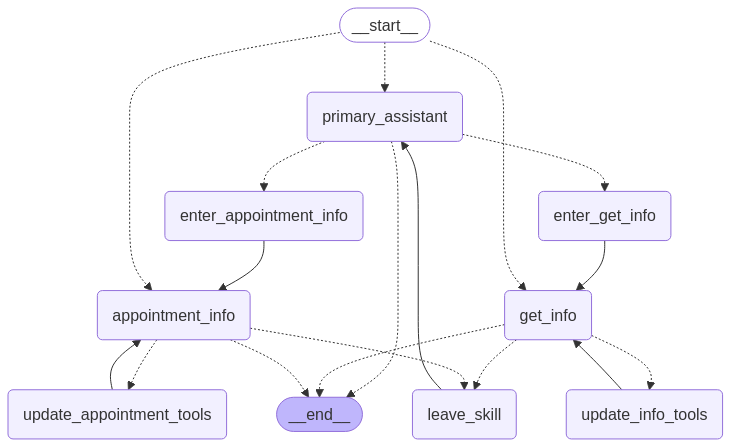

In [24]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [25]:
inputs = [
        HumanMessage(content='can you book an appointment with Jane smith at 8 August 2024?')
    ]
state = {'messages': inputs}
config = {"configurable": {"thread_id": '1111222', "recursion_limit": 10}}  

In [26]:
answer = graph.invoke(input=state,config=config)

In [28]:
answer['messages'][-1]

AIMessage(content='I can help you book an appointment with Dr. Jane Smith on 8 August 2024. Could you please provide your identification number to proceed with the booking?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 971, 'total_tokens': 1006, 'completion_tokens_details': {'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_65792305e4', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'fil

In [30]:
answer['dialog_state'][-1]

'appointment_info'

In [ ]:
from langgraph.checkpoint.sqlite import SqliteSaver

In [40]:
import json 

In [41]:
with open("yanni_json.json", "r") as file:
    yanni = json.load(file)

In [42]:
with open("kristen_json.json", "r") as file:
    kristen = json.load(file)

In [49]:
yanni_set = set([file['metadata']['filename'] for file in yanni['context']])
kristen_set = set([file['metadata']['filename'] for file in kristen['context']])

In [50]:
yanni_set - kristen_set

{'04-passbook_policies.pdf',
 '2020-03-02 Passbook Update Function in T4S now Available to Service Officer and Marketing Officer.pdf',
 'BranchBankingGroup/References/Issued Circulars/BBG - Branch Digital Transformation/2024/BBG H.O. Support BDT No. 2024-11-05 Issue Magstripe Passbook NOW!/ANNEX C - UM PASSBOOK UPDATE.pdf'}

In [56]:
yanni.keys()

dict_keys(['context', 'question', 'before_contextualized', 'answer', 'routed_category', 'llm_citation', 'trace_id', 'evaluation_metadata', 'status_code', 'endpoint_used', 'cache_hit', 'created_at', 'updated_at', 'is_followed', 'followed_query'])

In [55]:
yanni['question'],kristen['question']

('Who is authorized to update passbooks?',
 'Who is authorized to update passbooks?')

In [57]:
yanni['before_contextualized'],kristen['before_contextualized']

('Who is authorized to update passbooks?',
 'Who is authorized to update passbooks?')

In [58]:
yanni['routed_category'],kristen['routed_category']

('account_management', 'account_management')

In [59]:
yanni['trace_id'],kristen['trace_id']

('fa4abde1-8c03-47b3-9981-25742fca620c',
 '89d10bc3-1e86-49e9-97a3-1eb35e07af7f')